<a href="https://colab.research.google.com/github/wbfrench1/Intro_to_Stats_w_Python/blob/main/src/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# Basic Plots

## Create Single Plot

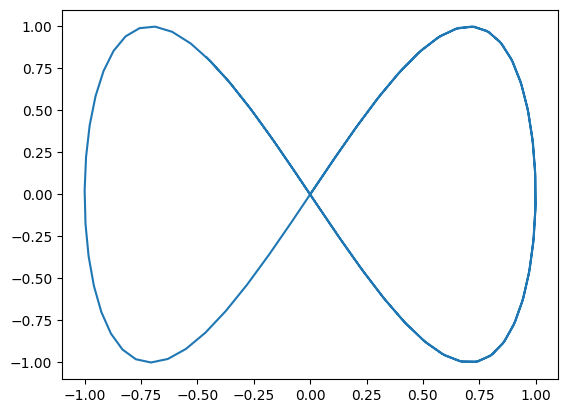

In [6]:
t = np.arange(0,10,0.1)

x = np.sin(t)
y = np.sin(2*t)

vx = np.cos(t)
vy = 2*np.cos(2*t)

fig, ax = plt.subplots()
ax.plot(x, y)

## Create 2 Subplots

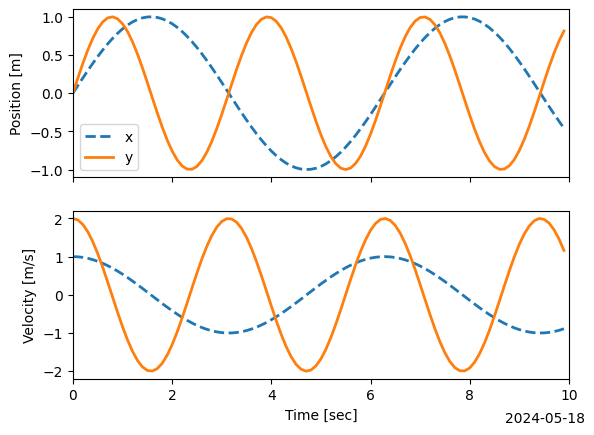

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=1,
                       sharex= True)

axs[0].plot(t, np.column_stack([x,y]), linewidth=2)
axs[1].plot(t, np.column_stack([vx,vy]), lw=2)

axs[0].set(ylabel='Position [m]')
axs[1].set(xlabel='Time [sec]', ylabel='Velocity [m/s]')

axs[0].set_xlim([0,10])

fig.text(0.8, 0.02, date.isoformat(datetime.date(year=2024, month=5, day=18)))

for ax in axs:
    lines = ax.get_lines()
    lines[0].set_linestyle('--')

axs[0].legend(['x','y'])
out_file= 'simple_figure.jpg'
plt.savefig(out_file, dpi=200)

# Plots of Data with one Variable

<function matplotlib.pyplot.show(close=None, block=None)>

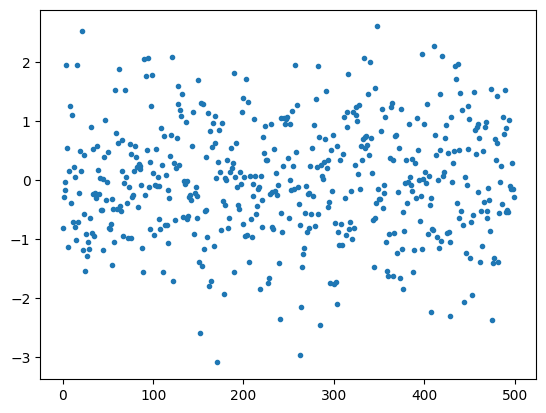

In [60]:
x= np.random.randn(500)

plt.plot(x, '.')
plt.show

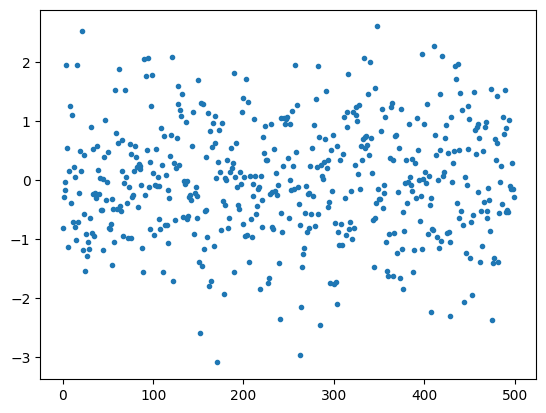

In [63]:
fig, axs= plt.subplots(1,1)
axs.plot(x,'.')

(array([ 2.,  0.,  2.,  4.,  3.,  8., 13., 13., 23., 38., 34., 39., 51.,
        54., 38., 43., 30., 26., 29., 17.,  9.,  8., 13.,  1.,  2.]),
 array([-3.09052917, -2.86306447, -2.63559977, -2.40813507, -2.18067036,
        -1.95320566, -1.72574096, -1.49827626, -1.27081155, -1.04334685,
        -0.81588215, -0.58841745, -0.36095274, -0.13348804,  0.09397666,
         0.32144136,  0.54890607,  0.77637077,  1.00383547,  1.23130018,
         1.45876488,  1.68622958,  1.91369428,  2.14115899,  2.36862369,
         2.59608839]),
 <BarContainer object of 25 artists>)

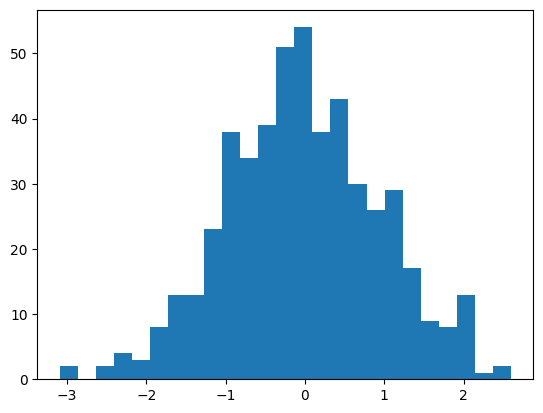

In [64]:
plt.hist(x, bins=25, density=False)

Text(0.5, 1.0, 'Density Histogram, 25 bins')

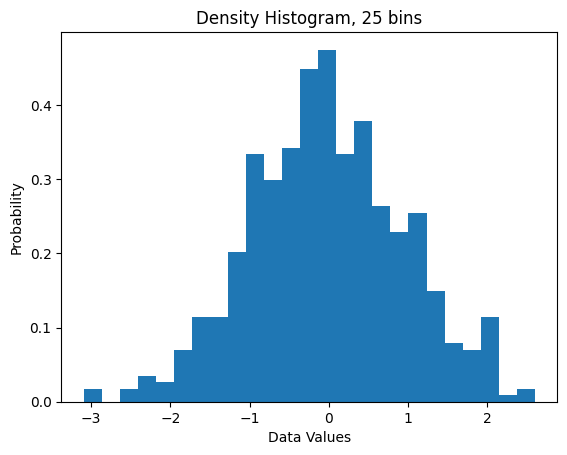

In [70]:
fig, ax= plt.subplots(1)
ax.hist(x, bins=25, density=True)
ax.set_xlabel('Data Values')
ax.set_ylabel('Probability')
ax.set_title('Density Histogram, 25 bins')

## Kernal-Density-Estimation (KDE) Plots

In [72]:
x= [-2.1, -1.3, -0.4, 1.9, 5.1, 6.2]

<Axes: ylabel='Density'>

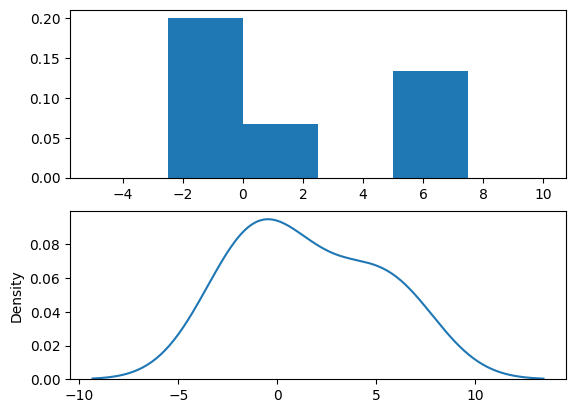

In [85]:
fig, ax= plt.subplots(nrows=2, ncols=1)
ax[0].hist(x, bins=6, density=True, range=[-5,10])
sns.kdeplot(x)

## Cumulative Frequency

Text(0.5, 1.0, 'Cumulative Distribution Function')

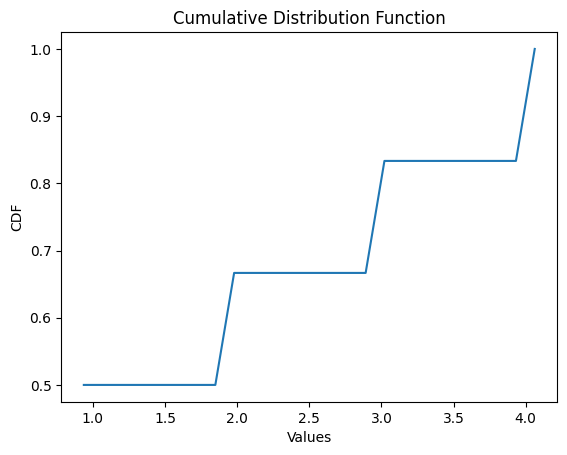

In [101]:
n_bins= 25

res= stats.cumfreq(x, numbins=n_bins)
lower_lim= res.lowerlimit
upper_lim= res.lowerlimit + n_bins*res.binsize
values= np.linspace(lower_lim, upper_lim, n_bins)
cdf= res.cumcount / len(x)

fig, ax= plt.subplots(1)

ax.plot(values, cdf)
plt.xlabel('Values')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function')

In [105]:
upper_lim

4.0625

In [94]:
rng= np.random.default_rng()
x= [1, 4, 2, 1, 3, 1]
res= stats.cumfreq(x, numbins=4, defaultreallimits= (1.5, 5))
res.cumcount
res.extrapoints

3

CumfreqResult(cumcount=array([1., 2., 3., 3.]), lowerlimit=1.5, binsize=0.875, extrapoints=3)